In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
!pip install pyccel
!pip install numba
from numba import njit
from pyccel.epyccel import epyccel
from pyccel.decorators import types
import sympy as sp
from sympy.utilities.lambdify import lambdify
from sympy import init_printing
init_printing(use_latex=True)



In [ ]:
def solve_1d_burger_pure(u, un, nt, nx, dt, dx, nu):
  for n in range(nt):
    for j in range(nx):
      un[j]=u[j]
    for i in range(1,nx-1):
      u[i]=un[i]+nu*(dt/(dx**2))*(un[i+1]-2*un[i]+un[i-1])-un[i]*(dt/dx)*(un[i]-un[i-1])
  return 0
        

In [ ]:
@njit
def solve_1d_burger_numba(u, un, nt, nx, dt, dx, nu):
  for n in range(nt):
    for j in range(nx):
      un[j]=u[j]
    for i in range(1,nx-1):
      u[i]=un[i]+nu*(dt/(dx**2))*(un[i+1]-2*un[i]+un[i-1])-un[i]*(dt/dx)*(un[i]-un[i-1])
  return 0

In [ ]:
@types('float[:]','float[:]','int','int','float','float','float')
def solve_1d_burger_pyccel(u, un, nt, nx, dt, dx, nu):
  for n in range(nt):
    for j in range(nx):
      un[j]=u[j]
    for i in range(1,nx-1):
      u[i]=un[i]+nu*(dt/(dx**2))*(un[i+1]-2*un[i]+un[i-1])-un[i]*(dt/dx)*(un[i]-un[i-1])
  return 0
        

**Input **


In [ ]:
#sympy computation
x, nu, t = sp.symbols('x nu t')
phi = (sp.exp(-(x - 4 * t)**2 / (4 * nu * (t + 1))) +
       sp.exp(-(x - 4 * t - 2 * sp.pi)**2 / (4 * nu * (t + 1))))

phiprime = phi.diff(x)
u = -2 * nu * (phiprime / phi) + 4
ufunc = lambdify((t, x, nu), u)

In [ ]:
###variable declarations
nx = 201
nt = 100
dx = 2 * np.pi / (nx - 1)
nu = .07
dt = dx * nu

x = np.linspace(0, 2 * np.pi, nx)
un = np.empty(nx)
t = 0

**Plot initial condition** 

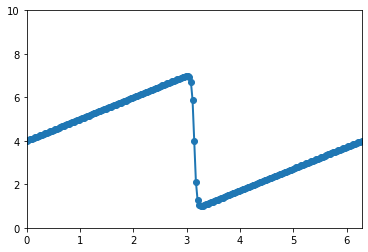

In [ ]:
u = np.asarray([ufunc(t, x0, nu) for x0 in x])
plt.figure()
plt.plot(x, u, marker='o', lw=2)
plt.xlim([0, 2 * np.pi])
plt.ylim([0, 10]);



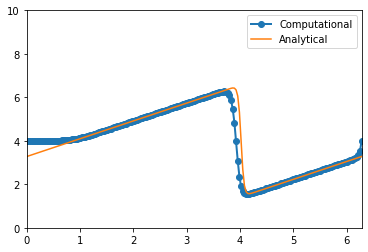

In [ ]:
solve_1d_burger_pure(u, un, nt, nx, dt, dx, nu)

# Analytical solution
u_analytical = np.asarray([ufunc(nt * dt, xi, nu) for xi in x])


#Plotting data
plt.figure()
plt.plot(x,u, marker='o', lw=2, label='Computational')
plt.plot(x, u_analytical, label='Analytical')
plt.xlim([0, 2 * np.pi])
plt.ylim([0, 10])
plt.legend();